In [218]:
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms


In [219]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''

    # TODO: Process a PIL image for use in a PyTorch model
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    size = 256, 256
    print("mean shape: ", mean.shape)
    with Image.open(image) as im:


        #print('flowers/train/1/image_06734.jpg',im)

        im.thumbnail(size)

        width, height = im.size

        if width < height:
            im = im.resize((256, int(height * (256 / width))))
        else:
            im = im.resize((int(width * (256 / height)), 256))

        left = (width - 224) / 2
        top = (height - 224) / 2
        right = (width + 224) / 2
        bottom = (height + 224) / 2

        cropped_im = im.crop((left, top, right, bottom))

        np_image = np.array(cropped_im)

        # Method 1: we are looping through this image 3 times because there is 3 color channels
        # We looking at a on specific cell and looking at changes to the color channel
        # np_image[1, 1, 0] = 13
        # (13 - 0.485) / 0.229 = 54.65
        """for i in range(3):
            print("color channel:", np_image[1, 1, 0])
            np_image[:, :, i] = (np_image[:, :, i] - mean[i]) / std[i]
            print("After color channel:", np_image[1, 1, 0])"""

        #Method 2:
        #print("color channel:", np_image[1, 1, 0])
        #np_image = np_image - mean / std
        #print("After color channel:", np_image[1, 1, 0])

        #we are converting this back to torch tensor because the model is expecting a torch tensor as well as transposing the the color channel
        np_image = torch.from_numpy(np_image)
        tensor_image = np_image.permute(2, 0, 1)
        #channels of images are typically encoded as integers 0-255, but the model expected floats 0-1.
        tensor_image = tensor_image.float()/255
        #print("Color channel", np_image[1,1,1])

        #Method 3: using torchvision transforms to normalize the image color channels
        print("Before Normalize transformation: ", tensor_image[0,1,1])
        print(tensor_image)
        transform = transforms.Normalize(mean, std)
        tensor_image = transform(tensor_image.float())
        #print("After Normalize transformation: ", np_image[0,1,1])


        print(tensor_image.shape)


    return tensor_image


In [220]:

def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    #print("Image type:",type(image))
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))

    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)

    ax.imshow(image)

    return ax


mean shape:  (3,)
Before Normalize transformation:  tensor(0.0510)
tensor([[[0.0431, 0.0431, 0.0392,  ..., 0.4627, 0.4627, 0.4431],
         [0.0510, 0.0510, 0.0471,  ..., 0.4706, 0.4667, 0.4549],
         [0.0392, 0.0549, 0.0510,  ..., 0.4824, 0.4667, 0.4627],
         ...,
         [0.0118, 0.0118, 0.0078,  ..., 0.1843, 0.2000, 0.2314],
         [0.0118, 0.0118, 0.0039,  ..., 0.2039, 0.2157, 0.2353],
         [0.0118, 0.0078, 0.0000,  ..., 0.2235, 0.2196, 0.2353]],

        [[0.1490, 0.1412, 0.1373,  ..., 0.4078, 0.4078, 0.3961],
         [0.1529, 0.1451, 0.1412,  ..., 0.4118, 0.4118, 0.4039],
         [0.1333, 0.1451, 0.1451,  ..., 0.4235, 0.4118, 0.4078],
         ...,
         [0.0392, 0.0431, 0.0431,  ..., 0.3294, 0.3451, 0.3765],
         [0.0431, 0.0471, 0.0431,  ..., 0.3412, 0.3451, 0.3686],
         [0.0392, 0.0431, 0.0392,  ..., 0.3451, 0.3412, 0.3608]],

        [[0.0431, 0.0392, 0.0314,  ..., 0.4039, 0.4039, 0.3882],
         [0.0431, 0.0510, 0.0431,  ..., 0.4078, 0.4078, 

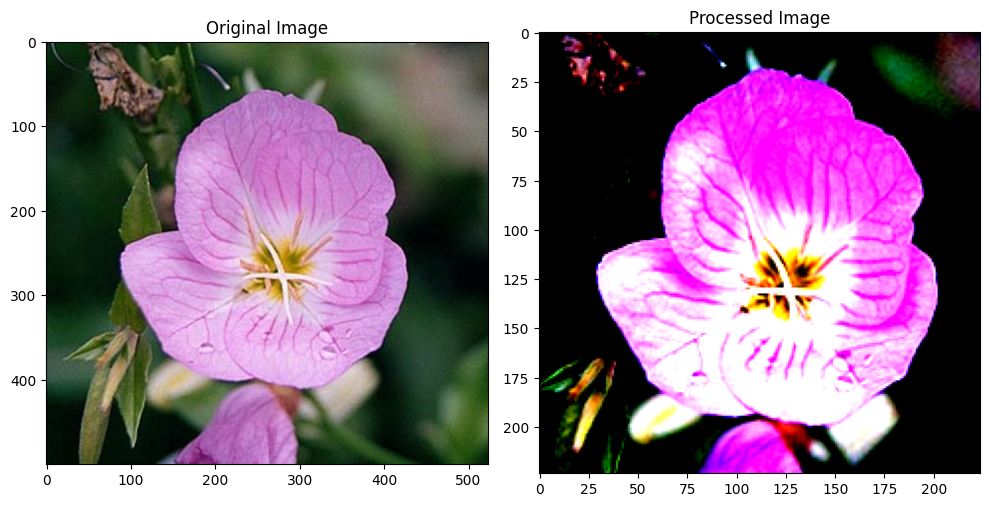

In [221]:
# Load and process the images
image1 = Image.open("flowers/train/1/image_06734.jpg")
image2 = process_image('flowers/train/1/image_06734.jpg')


image2_np = image2.permute(1, 2, 0).numpy()


fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image1)
axes[0].set_title("Original Image")
#axes[0].axis('off')


axes[1].imshow(image2_np)
axes[1].set_title("Processed Image")
#axes[1].axis('off')


plt.tight_layout()

plt.show()

mean shape:  (3,)
Before Normalize transformation:  tensor(0.0510)
tensor([[[0.0431, 0.0431, 0.0392,  ..., 0.4627, 0.4627, 0.4431],
         [0.0510, 0.0510, 0.0471,  ..., 0.4706, 0.4667, 0.4549],
         [0.0392, 0.0549, 0.0510,  ..., 0.4824, 0.4667, 0.4627],
         ...,
         [0.0118, 0.0118, 0.0078,  ..., 0.1843, 0.2000, 0.2314],
         [0.0118, 0.0118, 0.0039,  ..., 0.2039, 0.2157, 0.2353],
         [0.0118, 0.0078, 0.0000,  ..., 0.2235, 0.2196, 0.2353]],

        [[0.1490, 0.1412, 0.1373,  ..., 0.4078, 0.4078, 0.3961],
         [0.1529, 0.1451, 0.1412,  ..., 0.4118, 0.4118, 0.4039],
         [0.1333, 0.1451, 0.1451,  ..., 0.4235, 0.4118, 0.4078],
         ...,
         [0.0392, 0.0431, 0.0431,  ..., 0.3294, 0.3451, 0.3765],
         [0.0431, 0.0471, 0.0431,  ..., 0.3412, 0.3451, 0.3686],
         [0.0392, 0.0431, 0.0392,  ..., 0.3451, 0.3412, 0.3608]],

        [[0.0431, 0.0392, 0.0314,  ..., 0.4039, 0.4039, 0.3882],
         [0.0431, 0.0510, 0.0431,  ..., 0.4078, 0.4078, 

<Axes: >

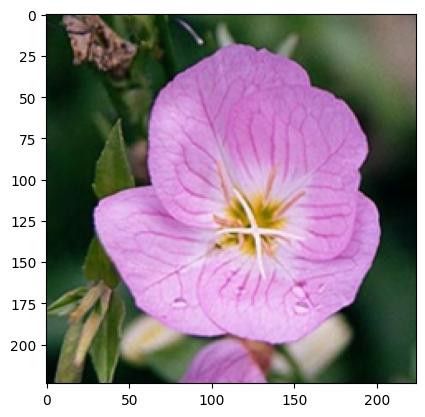

In [222]:
image2 = process_image('flowers/train/1/image_06734.jpg')
print(image2.shape)
print(image2)
imshow(image2)